https://towardsdatascience.com/using-bagging-and-boosting-to-improve-classification-tree-accuracy-6d3bb6c95e5b
https://github.com/dasotelo/Python_Projects/blob/master/Wine_Bag_Boost.py?source=post_page-----6d3bb6c95e5b----------------------

In [1]:
##########################################
# 
# Comparing Bagging and Boosting Ensemble Methods
# Author: D Sotelo
# Date 20170708
#
# Data available via Kaggle.com
# https://www.kaggle.com/zynicide/wine-reviews
#
##########################################

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Read in & munge wine information dataset.  US wines only
wine_df=pd.read_csv('.\Wine Reviews\winemag-data_first150k.csv')
wine_df=wine_df.loc[wine_df.country=='US',['points','price','region_1', \
    'variety','winery']]
wine_df=wine_df.dropna(axis=0,how='any')


In [ ]:
len(wine_df)

In [2]:
# Map point values to categories
bin_map={
    100:'90+',
    99:'90+',
    98:'90+',
    97:'90+',
    96:'90+',
    95:'90+',
    94:'90+',
    93:'90+',
    92:'90+',
    91:'90+',
    90:'90+',
    89:'<90',
    88:'<90',
    87:'<90',
    86:'<90',
    85:'<90',
    84:'<90',
    83:'<90',
    82:'<90',
    81:'<90',
    80:'<90',
    79:'<90',
    78:'<90',
    77:'<90',
    76:'<90'}
wine_df['point_bins']=wine_df.points.map(bin_map)
wine_df.point_bins.unique() # Ensure no records are un-binned
wine_df=wine_df.drop('points',axis=1)

#Prepare data for classification by labeling category data
regn_lab=LabelEncoder().fit(np.unique(wine_df.region_1.values))
var_lab=LabelEncoder().fit(np.unique(wine_df.variety.values))
wnry_lab=LabelEncoder().fit(np.unique(wine_df.winery.values))
wine_df['regn_enc']=regn_lab.transform(wine_df.region_1)
wine_df['var_enc']=var_lab.transform(wine_df.variety)
wine_df['wnry_enc']=wnry_lab.transform(wine_df.winery)
wine_df=wine_df.drop(['region_1','variety','winery'],axis=1)

# Split into 70/30 train/test datasets and set up training variables
wine_train,wine_test=train_test_split(wine_df,test_size=0.30)
x=wine_train.loc[:,['price','regn_enc','var_enc','wnry_enc']]
y=wine_train['point_bins']

# Train classification tree                
clf=DecisionTreeClassifier(max_features=None)
clf=clf.fit(x,y)

# Report classification results.  training dataset first, then test.  
train_error=y==clf.predict(x)
test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'regn_enc','var_enc','wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   ',clf.n_features_,' features out of: 4 features')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

@@@@@@@@@@@@@@@@@@@@@@@@@
CART w/ #leaf nodes =  17797
    4  features out of: 4 features
   training accuracy:  94.9%
   test accuracy:  81.0%


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


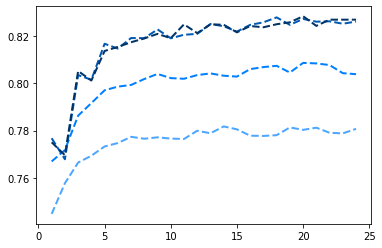

In [3]:
# Control the number of n_estimators in ensemble functions
max_n_ests=25

# Create dataframe to record results of ensembles.
results=pd.DataFrame([],columns=list(['type','n_leaf','n_est', \
    'train_acc','test_acc']))

# Train bagging ensemble on iterations of n_estimators=i
# and iterations of stump max_leaf_nodes=j
for j in [500,2000,8000,99999]:
    clf_stump=DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    for i in np.arange(1,max_n_ests):
        print(i)
        baglfy=BaggingClassifier(base_estimator=clf_stump,n_estimators=i,
            max_samples=1.0)
        baglfy=baglfy.fit(x,y)
        bag_tr_err=y==baglfy.predict(x)
        bag_tst_err=wine_test['point_bins']==baglfy.predict( \
            wine_test.loc[:,['price','regn_enc','var_enc','wnry_enc']])
        run_rslt=pd.DataFrame([['bag',j,i,sum(bag_tr_err)/len(bag_tr_err),
            sum(bag_tst_err)/len(bag_tst_err)]],
            columns=list(['type','n_leaf','n_est','train_acc','test_acc']))
        results=results.append(run_rslt)

# Train boosting ensemble on iterations of n_estimators=i
# and iterations of stump max_leaf_nodes=j
for j in [500,2000,8000,99999]:
    clf_stump=DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    for i in np.arange(1,max_n_ests):
        print(i)
        bstlfy=AdaBoostClassifier(base_estimator=clf_stump,n_estimators=i)
        bstlfy=bstlfy.fit(x,y)
        bst_tr_err=y==bstlfy.predict(x)
        bst_tst_err=wine_test['point_bins']==bstlfy.predict( \
            wine_test.loc[:,['price','regn_enc','var_enc','wnry_enc']])
        run_rslt=pd.DataFrame([['bst',j,i,sum(bst_tr_err)/len(bst_tr_err),
            sum(bst_tst_err)/len(bst_tst_err)]],
            columns=list(['type','n_leaf','n_est','train_acc','test_acc']))
        results=results.append(run_rslt)





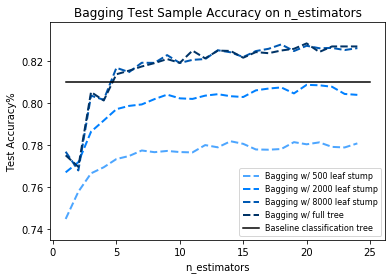

In [8]:

# Plot Bagging accuracy results on test data
# 500 leaf stumps
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==500)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==500)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#4da6ff', \
    label='Bagging w/ 500 leaf stump')
# 2000 leaf stumps
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==2000)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==2000)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#0080ff', \
    label='Bagging w/ 2000 leaf stump')
# 8000 leaf stumps
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==8000)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==8000)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#0059b3', \
    label='Bagging w/ 8000 leaf stump')
# Full Classification Trees (no early termination)
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==99999)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==99999)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#003366', \
    label='Bagging w/ full tree')
# Plot test accuracy of baseline classification tree
clf_test_acc=sum(test_error)/len(test_error)
plt.plot([1,max_n_ests],[clf_test_acc,clf_test_acc],color='k', \
    label='Baseline classification tree')
plt.legend(fontsize=8)
plt.title('Bagging Test Sample Accuracy on n_estimators')
plt.ylim([results.loc[results.type=='bag',['test_acc']].values.min()-0.01, \
    results.loc[results.type=='bag',['test_acc']].values.max()+0.01])
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')
plt.show()

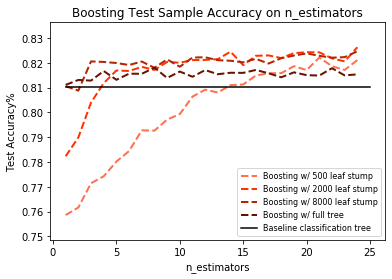

In [5]:
# Plot Boosting accuracy results on test data
# 500 leaf stumps
plt.plot(results.loc[((results.type=='bst')&(results.n_leaf==500)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.n_leaf==500)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#ff704d', \
    label='Boosting w/ 500 leaf stump')
# 2000 leaf stumps
plt.plot(results.loc[((results.type=='bst')&(results.n_leaf==2000)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.n_leaf==2000)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#ff3300', \
    label='Boosting w/ 2000 leaf stump')
# 8000 leaf stumps
plt.plot(results.loc[((results.type=='bst')&(results.n_leaf==8000)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.n_leaf==8000)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#b32400', \
    label='Boosting w/ 8000 leaf stump')
# Full Classification Trees (no early termination)
plt.plot(results.loc[((results.type=='bst')&(results.n_leaf==99999)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.n_leaf==99999)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#661400', \
    label='Boosting w/ full tree')
# Plot test accuracy of baseline classification tree
plt.plot([1,max_n_ests],[clf_test_acc,clf_test_acc],color='k', \
    label='Baseline classification tree')
plt.legend(fontsize=8)
plt.title('Boosting Test Sample Accuracy on n_estimators')
plt.ylim([results.loc[results.type=='bst',['test_acc']].values.min()-0.01, \
    results.loc[results.type=='bst',['test_acc']].values.max()+0.01])
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')
plt.show()

In [6]:
# ROC curve for baseline classification tree
clf_probs=clf.predict_proba(wine_test.loc[:,['price','regn_enc','var_enc', \
    'wnry_enc']])
fpr1,tpr1,thr1=roc_curve(np.where(wine_test['point_bins']=='90+',1.,0.), \
    clf_probs[:,0])
# ROC curve for bagging ensemble using full classification trees
bag_probs=baglfy.predict_proba(wine_test.loc[:,['price','regn_enc', \
    'var_enc','wnry_enc']])
fpr2,tpr2,thr2=roc_curve(np.where(wine_test['point_bins']=='90+',1.,0.), \
    bag_probs[:,0])
# ROC curve for boosting ensemble using full classification trees
bst_probs=bstlfy.predict_proba(wine_test.loc[:,['price','regn_enc', \
    'var_enc','wnry_enc']])
fpr3,tpr3,thr3=roc_curve(np.where(wine_test['point_bins']=='90+',1.,0.), \
    bst_probs[:,0])

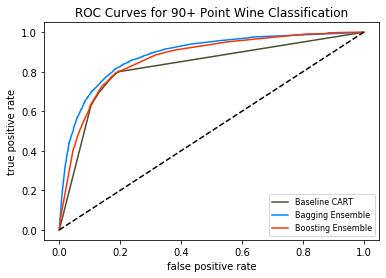

In [7]:
# Plot ROC Curves
plt.plot(fpr1,tpr1,color='#4d4d33',label='Baseline CART')
plt.plot(fpr2,tpr2,color='#0080ff',label='Bagging Ensemble')
plt.plot(fpr3,tpr3,color='#ff3300',label='Boosting Ensemble')
plt.plot([0.,1.],[0.,1.],color='k',linestyle='--')
plt.title('ROC Curves for 90+ Point Wine Classification')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(fontsize=8)
plt.show()